In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
np.random.seed(1)

In [2]:
## Reservoir Sampling Code
m = 100;
# n is unknown, but let us make an n array
N=np.random.uniform(low=0,high=1,size=(10000,))
n=len(N);# usually wouldn't know this

In [3]:
N

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       5.95336949e-02, 1.08043656e-01, 7.62793778e-01])

In [ ]:
x=np.linspace(1,10000)
y=N
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]

In [ ]:
reservoir=np.empty((m,))
reservoir[:]=np.nan
row=0
while row < n-1:
  if row < m-1:# check if in first m elements
    reservoir[row]=N[row];
  else:
    r = np.random.randint(low=0,high=row)
    if r <= m-1:# all these -1 comes due to zero indexing
      reservoir[r] = N[row]
  # print("done with row = ", row)
  row=row+1

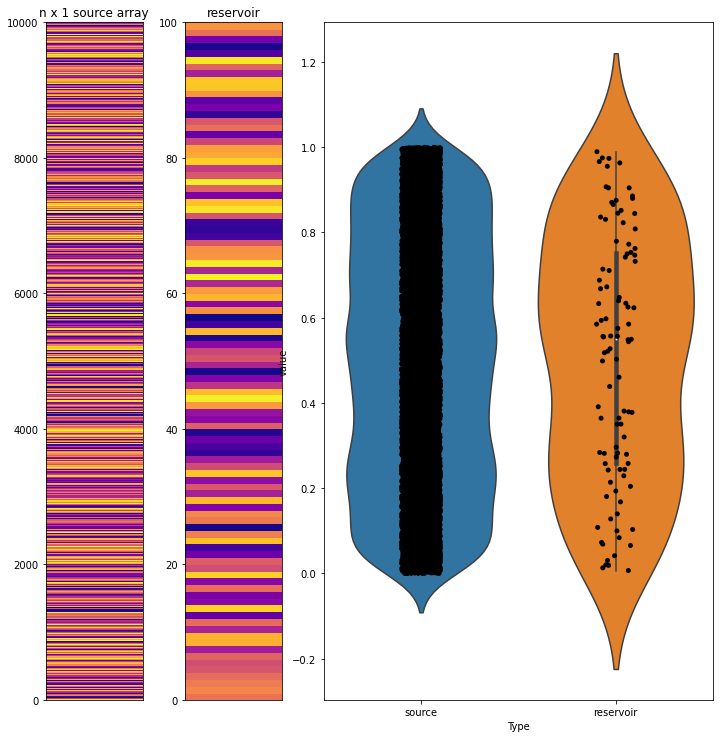

In [ ]:
mycmap='plasma'
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(10,10),gridspec_kw={'width_ratios': [1, 1, 4]})
plt.tight_layout()
ax1.pcolormesh(np.rot90([N,N]),cmap=mycmap,vmin=0,vmax=1)
ax1.set_xticks([])
ax1.set_title("n x 1 source array");

ax2.pcolormesh(np.rot90([reservoir,reservoir]),cmap=mycmap,vmin=0,vmax=1)
ax2.set_xticks([])
ax2.set_title("reservoir");


df1=pd.DataFrame(N,columns=['value'])
df1['Type']='source'
df2=pd.DataFrame(reservoir,columns=['value'])
df2['Type']='reservoir'
df=pd.concat([df1,df2],axis=0)
# plt.scatter(np.ones(n,),N,marker='.')
# plt.scatter(np.ones(m,)+1,reservoir,marker='.')

sns.violinplot(data=df,x='Type',y='value',ax=ax3)
sns.stripplot(data=df,x='Type',y='value',color='k',ax=ax3)